In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
print('done')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


done


In [2]:
xi = np.linspace(0,10,11)/10
tk = np.sin(2*np.pi*xi)

wji = np.random.random((len(xi), len(xi)))
aj = np.matmul(wji, xi)
zj = np.sin(2*np.pi*aj)

wkj = np.random.random((len(xi), len(xi)))
ak = np.matmul(wkj, zj)
yk = np.sin(2*np.pi*ak)

delta_tilde = 2*np.pi*np.cos(2*np.pi*ak) * (yk-tk)
# print(delta_tilde)

delta = 2*np.pi*np.cos(2*np.pi*aj) * np.matmul(wkj, delta_tilde)
# print(delta)

delE_delwkj = delta_tilde * zj
delE_delwji = delta * xi

print(delE_delwji)
print(delE_delwkj)

E = 0.5*np.sum((yk - tk)**2)
print(E)

eta = 0.1
delwji = -eta*delE_delwji
delwkj = -eta*delE_delwkj
print(delwji)
print(delwkj)

[  0.          -4.29723394  -0.27024504  -1.31058542   9.08407553
  11.97014895  -1.89848767 -11.27993554  -7.82034901  -1.10121713
  10.39156898]
[-1.35102331 -0.95385699 -2.60803603 -1.09531953  0.43659569  0.56978107
 -5.1541927   3.7322991   0.01692104 -2.43522193  0.02951816]
7.62307906875381
[-0.          0.42972339  0.0270245   0.13105854 -0.90840755 -1.1970149
  0.18984877  1.12799355  0.7820349   0.11012171 -1.0391569 ]
[ 0.13510233  0.0953857   0.2608036   0.10953195 -0.04365957 -0.05697811
  0.51541927 -0.37322991 -0.0016921   0.24352219 -0.00295182]


0.0009541101733965509
236
done


Text(0,0.5,'E')

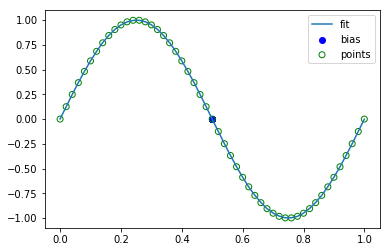

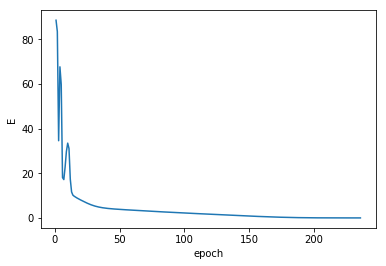

In [5]:
def f(x):
    return np.sin(2*np.pi*x)

def g(a):
    return np.arctan(a)
#     return 1/(1 + np.e**(-a))

def dg(a):
    return 1 + g(a)**2
#     return g(a)*(1-g(a))

def g_tilde(a):
#     return a
    return np.arctan(a)
#     return 1/(1 + np.e**(-a))

def dg_tilde(a):
#     return np.ones((a.shape[0], a.shape[1]))
    return 1 + g(a)**2
#     return g(a)*(1-g(a))

def mult(a,b):
        k = a.shape[1]
        j = a.shape[0]
        i = b.shape[0]
        result = np.zeros((j,i,k))
        for z in range(q):
            for y in range(j):
                for x in range(i):
                    result[y,x,z] = a[y,z] * b[x,z]
        return result

#i = 11, j = 3, k = 11, q = 3
i = 51
j = 4
k = i
q = 2
# obtain x and t coords
x = np.empty((i,q))
for Q in range(q):
    if Q == 0:
        x[:,Q] = 0.5*np.ones(i)
        continue
    x[:,Q] = np.linspace(0,1,i)

tk = f(x)
# tk[:,2] = f(1.5*x[:,2])
w1 = np.random.random((j,i)) # jxi
w2 = np.random.random((k,j)) # kxj
wji = np.copy(w1)
wkj = np.copy(w2)
eta = 0.01

E = []
epoch = []
step = 0
while True:
    # obtain zj
    aj = np.matmul(wji, x) # jxq
    zj = g(aj) # jxq

    # obtain yk
    ak = np.matmul(wkj, zj) # kxq
    yk = g_tilde(ak) # kxq

    # calc delE_delw
    delta_tilde = dg_tilde(ak) * (yk - tk) # kxq
    delta = dg(aj) * np.matmul(wkj.T, delta_tilde) #kx3
    delE_delwkj = mult(delta_tilde, zj) # kxj
    delE_delwji = mult(delta, x) # 11x3

    # change
    delE_delwji_allq = np.sum(delE_delwji, axis = 2)
    delE_delwkj_allq = np.sum(delE_delwkj, axis = 2)
    dwji = -eta*delE_delwji_allq
    dwkj = -eta*delE_delwkj_allq

    e = 0
    for Q in range(q):
        for K in range(k):
            e += (yk[K,Q] - tk[K,Q])**2
    e /= 2
    step += 1
    E.append(e)
    epoch.append(step)
    if e < 1e-3:
        break
    wji = wji + dwji
    wkj = wkj + dwkj
    
print(e)
print(step)
# print(dwji)
# print(dwkj)
# print(yk)
print('done')
fig1 = plt.figure()
plt.scatter(x[:,0], tk[:,0], color = 'blue', label = 'bias')
plt.scatter(x[:,1], tk[:,1], color = 'green', label = 'points', facecolor = 'none')
# plt.scatter(x[:,2], tk[:,2], color = 'red')
plt.plot(x[:,1], yk[:,1], label = 'fit')
plt.legend()
fig2 = plt.figure()
plt.plot(epoch, E)
plt.xlabel('epoch')
plt.ylabel('E')